In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



# 1. Cargar el dataset
df = pd.read_csv('../Data/Mall_Customers.csv')
df.head().T









,0,1,2,3,4
CustomerID,1,2,3,4,5
Gender,Male,Male,Female,Female,Female
Age,19,21,20,23,31
Annual Income (k$),15,15,16,16,17
Spending Score (1-100),39,81,6,77,40


In [7]:
# Seleccionar las columnas relevantes
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Visualización básica
print(data.describe())


       Annual Income (k$)  Spending Score (1-100)
count          200.000000              200.000000
mean            60.560000               50.200000
std             26.264721               25.823522
min             15.000000                1.000000
25%             41.500000               34.750000
50%             61.500000               50.000000
75%             78.000000               73.000000
max            137.000000               99.000000


c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\AppData\Local\Temp\ipykernel_16360\4168792318.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Cluster_{k}'] = clusters


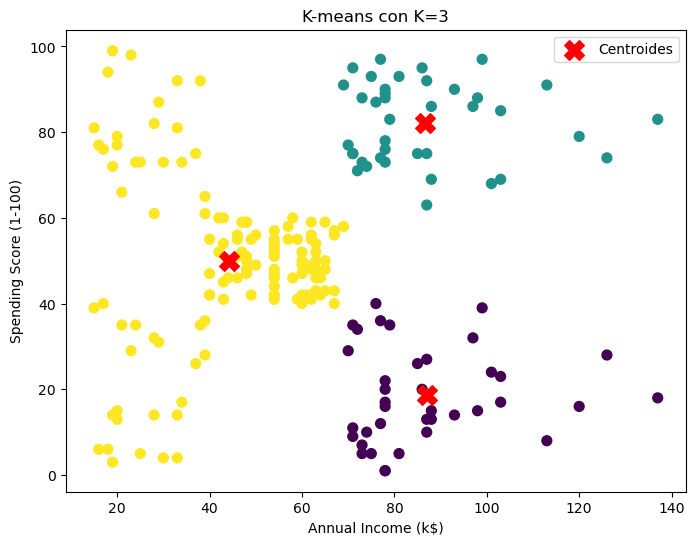

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Acer\AppData\Local\Temp\ipykernel_16360\4168792318.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'Cluster_{k}'] = clusters


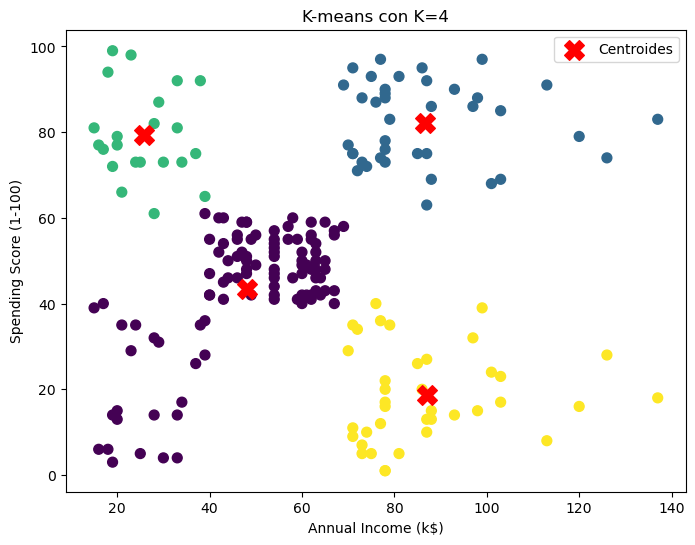

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


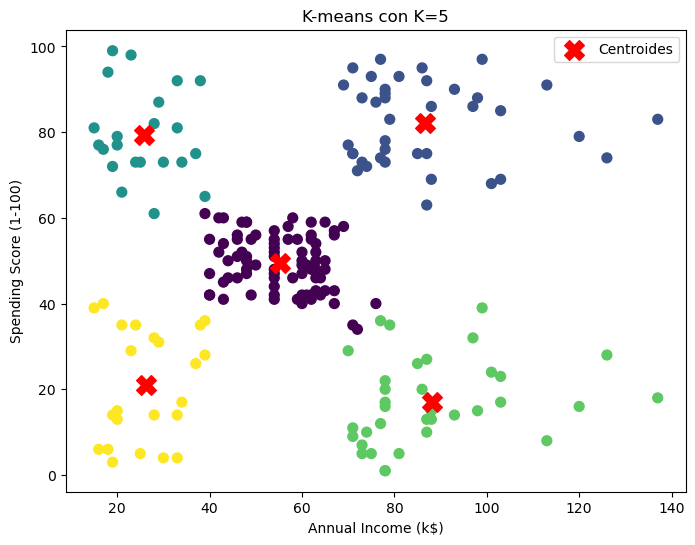

In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Probar con diferentes valores de K
k_values = [3, 4, 5]

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(data)
    data[f'Cluster_{k}'] = clusters

    # Graficar resultados
    plt.figure(figsize=(8, 6))
    plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=clusters, cmap='viridis', s=50)
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroides')
    plt.title(f'K-means con K={k}')
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend()
    plt.show()


c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

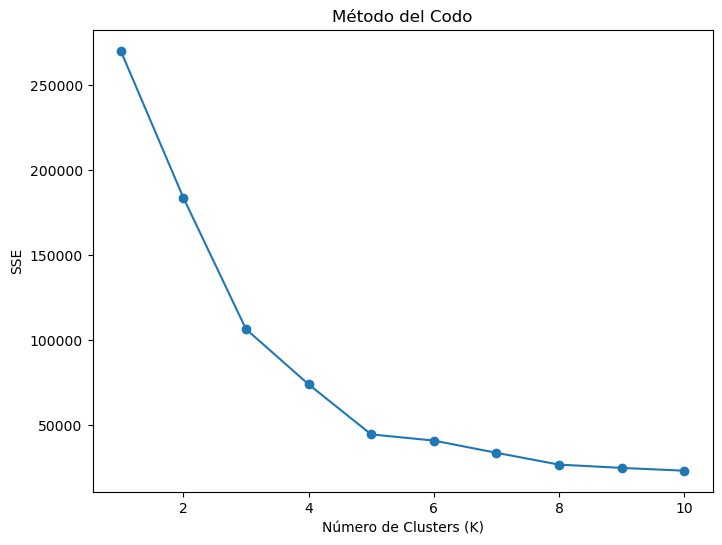

In [9]:
sse = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('SSE')
plt.show()


In [11]:
# Analizar características de cada cluster para un valor específico de K
optimal_k = 4  # Suponiendo que K=4 es óptimo según el método del codo
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster_Optimal'] = kmeans_optimal.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

# Resumir las características de cada cluster
print("\nResumen de clusters para K=4:")
print(data.groupby('Cluster_Optimal').mean())

c:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Resumen de clusters para K=4:
                 Annual Income (k$)  Spending Score (1-100)  Cluster_3  \
Cluster_Optimal                                                          
0                         48.168317               43.396040        2.0   
1                         86.538462               82.128205        1.0   
2                         25.727273               79.363636        2.0   
3                         87.000000               18.631579        0.0   

                 Cluster_4  Cluster_5  
Cluster_Optimal                        
0                      0.0   0.910891  
1                      1.0   1.000000  
2                      2.0   2.000000  
3                      3.0   2.763158  


In [10]:
for k in range(3, 6):
    print(f'\nAnálisis para K={k}:')
    grouped = data.groupby(f'Cluster_{k}')
    print(grouped.mean())



Análisis para K=3:
           Annual Income (k$)  Spending Score (1-100)  Cluster_4  Cluster_5
Cluster_3                                                                  
0                   87.000000               18.631579   3.000000   2.763158
1                   86.538462               82.128205   1.000000   1.000000
2                   44.154472               49.829268   0.357724   1.105691

Análisis para K=4:
           Annual Income (k$)  Spending Score (1-100)  Cluster_3  Cluster_5
Cluster_4                                                                  
0                   48.168317               43.396040        2.0   0.910891
1                   86.538462               82.128205        1.0   1.000000
2                   25.727273               79.363636        2.0   2.000000
3                   87.000000               18.631579        0.0   2.763158

Análisis para K=5:
           Annual Income (k$)  Spending Score (1-100)  Cluster_3  Cluster_4
Cluster_5                   

Conclusión
Clusters Consistentes:

Los clientes premium (alto ingreso y alto puntaje de gasto) permanecen consistentes en todos los análisis y deben ser el objetivo principal de estrategias exclusivas.
Clientes con ingresos altos y bajo gasto necesitan incentivos específicos para aumentar su gasto.
K Óptimo:

Según el método del codo (no incluido aquí pero esencial), K=4 parece ser el equilibrio ideal entre simplicidad y segmentación adecuada.
Recomendaciones para Marketing:

Cluster 1 (Clientes Premium): Enfocar estrategias de fidelización, beneficios VIP y lanzamientos exclusivos.
Cluster 2 (Ingresos Bajos, Gasto Alto): Desarrollar promociones personalizadas y accesibles.
Cluster 3 o 4 (Bajo Gasto): Implementar campañas para involucrar más a los clientes y aumentar el valor promedio de compra.